In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen
from geopy.geocoders import Nominatim
import folium
from math import *

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib
import wget

## From Paris with love


In [2]:
paris_borough_df = pd.read_excel("arrondissements__paris.xlsx")

In [3]:
paris_borough_df.rename(columns={"Numéro d’arrondissement" : "Borough_number", "Nom officiel de l’arrondissement" : "Borough_name", "Geometry X Y" : "Borough_coordonates", "Surface" : "Borough_area", "Périmètre" : "Borough_perimeter"}, inplace=True)

In [4]:
paris_borough_df.drop(["Identifiant séquentiel de l’arrondissement", "Numéro d’arrondissement INSEE", "Nom de l’arrondissement", "N_SQ_CO", "Geometry"], 1, inplace=True)

In [5]:
paris_neighborhood_df = pd.read_excel("quartiers_administratifs_paris.xlsx")

In [6]:
paris_neighborhood_df.drop(["N_SQ_QU", "C_QUINSEE", "N_SQ_AR", "Geometry"], axis=1, inplace=True)

In [7]:
paris_neighborhood_df.rename(columns={"C_QU" : "Neighborhood_number", "L_QU" : "Neighborhood_name", "Geometry X Y" : "Neighborhood_coordonates", "C_AR" : "Borough_number"}, inplace=True)

In [8]:
paris_dataframe = pd.merge(paris_borough_df, paris_neighborhood_df, on="Borough_number")

In [9]:
paris_dataframe.rename(columns={"Neighborhood_number_y" : "Neighborhood_number", "SURFACE" : "Neighborhood_area", "PERIMETRE" : "Neighborhood_perimeter"}, inplace=True)

In [10]:
coordonate_liste = []

for i in paris_dataframe["Borough_coordonates"]:
    coordonate_liste.append(i.split(","))
    

In [11]:
latitude_borough_paris = []
longitude_borough_paris = []

for i in coordonate_liste:
    latitude_borough_paris.append(i[0])
    longitude_borough_paris.append(i[1])

paris_dataframe["Borough_latitude"] = latitude_borough_paris
paris_dataframe["Borough_longitude"] = longitude_borough_paris

In [12]:
paris_dataframe.drop(["Borough_coordonates"], 1, inplace=True)

In [13]:
paris_dataframe.head()

,Borough_number,Borough_name,Borough_area,Borough_perimeter,Neighborhood_number,Neighborhood_name,Neighborhood_perimeter,Neighborhood_area,Neighborhood_coordonates,Borough_latitude,Borough_longitude
0,6,Luxembourg,2.153096e+06,6483.686786,23,Notre-Dame-des-Champs,4559.989773,8.613070e+05,"48.846427594,2.32735687823",48.8491303586,2.33289799905
1,6,Luxembourg,2.153096e+06,6483.686786,24,Saint-Germain-des-PrÃ©s,2565.899893,2.822799e+05,"48.85528872,2.33365686809",48.8491303586,2.33289799905
2,6,Luxembourg,2.153096e+06,6483.686786,21,Monnaie,2391.122818,2.933606e+05,"48.8543844036,2.34003537113",48.8491303586,2.33289799905
3,6,Luxembourg,2.153096e+06,6483.686786,22,OdÃ©on,3516.314464,7.161484e+05,"48.8478006293,2.33633882759",48.8491303586,2.33289799905
4,12,Reuilly,1.631478e+07,24089.666298,48,Quinze-Vingts,4509.486974,1.235916e+06,"48.8469159441,2.37440162648",48.8349743815,2.42132490078


In [14]:
coordonate_liste = []
latitude_neighborhood_paris = []
longitude_neighborhood_paris = []

for i in paris_dataframe["Neighborhood_coordonates"]:
    coordonate_liste.append(i.split(","))

for i in coordonate_liste:
    latitude_neighborhood_paris.append(i[0])
    longitude_neighborhood_paris.append(i[1])

paris_dataframe["Neighborhood_latitude"] = latitude_neighborhood_paris
paris_dataframe["Neighborhood_longitude"] = longitude_neighborhood_paris

paris_dataframe.drop(["Neighborhood_coordonates"], 1, inplace=True)



In [15]:
paris_dataframe.shape

(80, 12)

In [16]:
paris_dataframe.head(60)

,Borough_number,Borough_name,Borough_area,Borough_perimeter,Neighborhood_number,Neighborhood_name,Neighborhood_perimeter,Neighborhood_area,Borough_latitude,Borough_longitude,Neighborhood_latitude,Neighborhood_longitude
0,6,Luxembourg,2.153096e+06,6483.686786,23,Notre-Dame-des-Champs,4559.989773,8.613070e+05,48.8491303586,2.33289799905,48.846427594,2.32735687823
1,6,Luxembourg,2.153096e+06,6483.686786,24,Saint-Germain-des-PrÃ©s,2565.899893,2.822799e+05,48.8491303586,2.33289799905,48.85528872,2.33365686809
2,6,Luxembourg,2.153096e+06,6483.686786,21,Monnaie,2391.122818,2.933606e+05,48.8491303586,2.33289799905,48.8543844036,2.34003537113
3,6,Luxembourg,2.153096e+06,6483.686786,22,OdÃ©on,3516.314464,7.161484e+05,48.8491303586,2.33289799905,48.8478006293,2.33633882759
4,12,Reuilly,1.631478e+07,24089.666298,48,Quinze-Vingts,4509.486974,1.235916e+06,48.8349743815,2.42132490078,48.8469159441,2.37440162648
5,12,Reuilly,1.631478e+07,24089.666298,45,Bel-Air,18427.822238,5.970921e+06,48.8349743815,2.42132490078,48.8379956461,2.43317844196
6,12,Reuilly,1.631478e+07,24089.666298,47,Bercy,6155.005036,1.902932e+06,48.8349743815,2.42132490078,48.8352090499,2.38621008421
7,12,Reuilly,1.631478e+07,24089.666298,46,Picpus,18261.910318,7.205014e+06,48.8349743815,2.42132490078,48.8303592424,2.42882681508
8,3,Temple,1.170883e+06,4519.263648,10,Enfants-Rouges,2139.625388,2.717503e+05,48.86287238,2.3600009859,48.863887392,2.36312330099
9,3,Temple,1.170883e+06,4519.263648,9,Arts-et-MÃ©tiers,2482.460453,3.180877e+05,48.86287238,2.3600009859,48.8664702895,2.35708313106


In [17]:
address = "Paris, France"

geolocator = Nominatim(user_agent="paris_agent")
location_borough_paris = geolocator.geocode(address)
Latitude_borough_paris = location_borough_paris.latitude
Longitude_borough_paris = location_borough_paris.longitude
print(location_borough_paris)
print(Latitude_borough_paris)
print(Longitude_borough_paris)

Paris, Île-de-France, France métropolitaine, France
48.8566969
2.3514616


In [18]:
paris_borough_map = folium.Map([Latitude_borough_paris, Longitude_borough_paris], zoom_start=12,)

In [19]:
x = np.arange(len(paris_borough_df["Borough_number"]))
ys = [i + x + (i*x)**2 for i in range(len(paris_borough_df["Borough_number"]))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for number, name, latitude, longitude, area in zip(paris_dataframe["Borough_number"].unique(), paris_dataframe["Borough_name"].unique(), paris_dataframe["Borough_latitude"].unique(), paris_dataframe["Borough_longitude"].unique(), paris_dataframe["Borough_area"].unique()):
    label = "{}, {}".format(number, name,)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [latitude, longitude],
        radius=(sqrt(area/(3.14))*0.4), 
        popup=label,                   
        color='Black',
        fill=True,
        fill_color=rainbow[number-1],
        fill_opacity=0.7,
        
        parse_html=False).add_to(paris_borough_map)  

In [20]:
paris_borough_map

In [25]:
paris_dataframe.groupby(by="Borough_name").count()

,Borough_number,Borough_area,Borough_perimeter,Neighborhood_number,Neighborhood_name,Neighborhood_perimeter,Neighborhood_area,Borough_latitude,Borough_longitude,Neighborhood_latitude,Neighborhood_longitude
Borough_name,,,,,,,,,,,
Batignolles-Monceau,4,4,4,4,4,4,4,4,4,4,4
Bourse,4,4,4,4,4,4,4,4,4,4,4
Buttes-Chaumont,4,4,4,4,4,4,4,4,4,4,4
Buttes-Montmartre,4,4,4,4,4,4,4,4,4,4,4
Entrepôt,4,4,4,4,4,4,4,4,4,4,4
Gobelins,4,4,4,4,4,4,4,4,4,4,4
Hôtel-de-Ville,4,4,4,4,4,4,4,4,4,4,4
Louvre,4,4,4,4,4,4,4,4,4,4,4
Luxembourg,4,4,4,4,4,4,4,4,4,4,4


In [22]:
paris_neighborhood_map = folium.Map([Latitude_borough_paris, Longitude_borough_paris], zoom_start=12.4, tiles="Stamen Terrain")

In [23]:
x = np.arange(len(paris_borough_df["Borough_number"]))
ys = [i + x + (i*x)**2 for i in range(len(paris_borough_df["Borough_number"]))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for borough_number, neighborhood_name, neighborhood_number, borough_name, neighborhood_latitude, neighborhood_longitude, area in zip(paris_dataframe["Borough_number"], paris_dataframe["Neighborhood_name"], paris_dataframe["Neighborhood_number"], paris_dataframe["Borough_name"], paris_dataframe["Neighborhood_latitude"], paris_dataframe["Neighborhood_longitude"], paris_dataframe["Neighborhood_area"]):
    label = "{}, {}, {}".format(neighborhood_number, neighborhood_name, borough_name.upper())
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [neighborhood_latitude, neighborhood_longitude],
        radius=(sqrt(area/(3.14))*0.4),
        popup=label,
        color="Black",
        fill=True,
        fill_color=rainbow[borough_number-1],
        fill_opacity=0.7,
        
        parse_html=False).add_to(paris_neighborhood_map)  

In [24]:
paris_neighborhood_map

## Foursquare API

In [27]:
CLIENT_ID = "IANMGQPONLABER3SH0HMNNOYIVQIRCYKECZJCL0SFN23UPCI"
CLIENT_SECRET = "T2O3VAUWRSUAOEW0T1B54RLPNB2G3SQD324HYI2U42LFVOOD"
VERSION = "20180605"
RADIUS = 750
LIMIT = 70

QUERY = "Bar"

### On Paris - Neighborhood: Petit-Montrouge

In [28]:
for index, i in enumerate(paris_dataframe["Neighborhood_name"]):
    print(index, i)

0 Notre-Dame-des-Champs
1 Saint-Germain-des-PrÃ©s
2 Monnaie
3 OdÃ©on
4 Quinze-Vingts
5 Bel-Air
6 Bercy
7 Picpus
8 Enfants-Rouges
9 Arts-et-MÃ©tiers
10 Archives
11 Sainte-Avoie
12 Invalides
13 Gros-Caillou
14 Saint-Thomas-d'Aquin
15 Ecole-Militaire
16 Muette
17 Chaillot
18 Auteuil
19 Porte-Dauphine
20 Saint-Ambroise
21 Folie-MÃ©ricourt
22 Sainte-Marguerite
23 Roquette
24 Place-VendÃ´me
25 Halles
26 Saint-Germain-l'Auxerrois
27 Palais-Royal
28 Mail
29 Bonne-Nouvelle
30 Vivienne
31 Gaillon
32 Pont-de-Flandre
33 AmÃ©rique
34 Combat
35 Villette
36 Saint-Vincent-de-Paul
37 Porte-Saint-Denis
38 Porte-Saint-Martin
39 HÃ´pital-Saint-Louis
40 Epinettes
41 Plaine de Monceaux
42 Batignolles
43 Ternes
44 PÃ¨re-Lachaise
45 Charonne
46 Belleville
47 Saint-Fargeau
48 Necker
49 Javel
50 Saint-Lambert
51 Grenelle
52 Saint-Merri
53 Notre-Dame
54 Saint-Gervais
55 Arsenal
56 Petit-Montrouge
57 Montparnasse
58 Parc-de-Montsouris
59 Plaisance
60 Faubourg-Montmartre
61 Rochechouart
62 Saint-Georges
63 ChaussÃ

In [29]:
paris_neighborhood_name = paris_dataframe.loc[26, "Neighborhood_name"]
paris_neighborhood_latitude = paris_dataframe.loc[26, "Neighborhood_latitude"]
paris_neighborhood_longitude = paris_dataframe.loc[26, "Neighborhood_longitude"]

print(paris_neighborhood_name)
print(paris_neighborhood_latitude)
print(paris_neighborhood_longitude)

Saint-Germain-l'Auxerrois
48.8606501352
2.33491032928


In [30]:
url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&query={}".format(CLIENT_ID, 
                                                                                                                           CLIENT_SECRET, 
                                                                                                                           paris_neighborhood_latitude, 
                                                                                                                           paris_neighborhood_longitude, 
                                                                                                                           VERSION, 
                                                                                                                           RADIUS, 
                                                                                                                           LIMIT,
                                                                                                                           
                                                                                                                           QUERY)

In [31]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f0db53b5947492e3e7ef4b5'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Paris',
  'headerFullLocation': 'Paris',
  'headerLocationGranularity': 'city',
  'query': 'bar',
  'totalResults': 76,
  'suggestedBounds': {'ne': {'lat': 48.86740014195, 'lng': 2.345151215776281},
   'sw': {'lat': 48.85390012844999, 'lng': 2.324669442783719}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b7b0998f964a520bf4d2fe3',
       'name': 'Le Café Blanc',
       'location': {'address': '10 rue Croix des Petits Champs',
        'lat': 48.862719,
        'lng': 2.339578,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.862719,
          'lng'

In [32]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [33]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(25)

,name,categories,lat,lng
0,Le Café Blanc,Bar,48.862719,2.339578
1,Au Caveau Montpensier,Bar,48.864676,2.336636
2,Café de la Comédie,Bar,48.863136,2.335770
3,Prescription Cocktail Club,Cocktail Bar,48.854921,2.337768
4,L'Express Bar,Bar,48.861180,2.343982
5,Cocorico,Bar,48.859124,2.328991
6,Le Garde-Robe,Wine Bar,48.860966,2.342505
7,Le Fumoir,Cocktail Bar,48.860424,2.340868
8,Freddy's,Tapas Restaurant,48.854095,2.336873
9,Kong,French Restaurant,48.859206,2.343049


### On all the Neighborhood of Paris

In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            QUERY)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [35]:
paris_venues = getNearbyVenues(names=paris_dataframe['Neighborhood_name'],
                                   latitudes=paris_dataframe["Neighborhood_latitude"],
                                   longitudes=paris_dataframe["Neighborhood_longitude"])

Notre-Dame-des-Champs
Saint-Germain-des-PrÃ©s
Monnaie
OdÃ©on
Quinze-Vingts
Bel-Air
Bercy
Picpus
Enfants-Rouges
Arts-et-MÃ©tiers
Archives
Sainte-Avoie
Invalides
Gros-Caillou
Saint-Thomas-d'Aquin
Ecole-Militaire
Muette
Chaillot
Auteuil
Porte-Dauphine
Saint-Ambroise
Folie-MÃ©ricourt
Sainte-Marguerite
Roquette
Place-VendÃ´me
Halles
Saint-Germain-l'Auxerrois
Palais-Royal
Mail
Bonne-Nouvelle
Vivienne
Gaillon
Pont-de-Flandre
AmÃ©rique
Combat
Villette
Saint-Vincent-de-Paul
Porte-Saint-Denis
Porte-Saint-Martin
HÃ´pital-Saint-Louis
Epinettes
Plaine de Monceaux
Batignolles
Ternes
PÃ¨re-Lachaise
Charonne
Belleville
Saint-Fargeau
Necker
Javel
Saint-Lambert
Grenelle
Saint-Merri
Notre-Dame
Saint-Gervais
Arsenal
Petit-Montrouge
Montparnasse
Parc-de-Montsouris
Plaisance
Faubourg-Montmartre
Rochechouart
Saint-Georges
ChaussÃ©e-d'Antin
Clignancourt
Goutte-d'Or
La Chapelle
Grandes-CarriÃ¨res
Gare
SalpÃªtriÃ¨re
Maison-Blanche
Croulebarbe
Val-de-GrÃ¢ce
Sorbonne
Jardin-des-Plantes
Saint-Victor
Faubourg-du-Ro

In [36]:
paris_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Notre-Dame-des-Champs,48.846427594,2.32735687823,Falstaff,48.842855,2.326213,Pub
1,Notre-Dame-des-Champs,48.846427594,2.32735687823,Lucernaire Forum,48.844147,2.330292,Bar
2,Notre-Dame-des-Champs,48.846427594,2.32735687823,La Marine,48.844259,2.323372,Bar
3,Notre-Dame-des-Champs,48.846427594,2.32735687823,Le Trait d'Union,48.846889,2.326759,Bar
4,Notre-Dame-des-Champs,48.846427594,2.32735687823,Le Dream Café,48.844680,2.321902,Bar


In [37]:
paris_venues.groupby("Neighborhood").count().head(30)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
AmÃ©rique,3,3,3,3,3,3
Archives,57,57,57,57,57,57
Arsenal,32,32,32,32,32,32
Arts-et-MÃ©tiers,67,67,67,67,67,67
Batignolles,18,18,18,18,18,18
Belleville,28,28,28,28,28,28
Bercy,10,10,10,10,10,10
Bonne-Nouvelle,70,70,70,70,70,70
Chaillot,16,16,16,16,16,16


In [38]:
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

for index, name in enumerate(paris_onehot.columns):
    print(index, name)

0 American Restaurant
1 Asian Restaurant
2 Bar
3 Beer Bar
4 Beer Garden
5 Beer Store
6 Belgian Restaurant
7 Bistro
8 Boat or Ferry
9 Brasserie
10 Brazilian Restaurant
11 Breakfast Spot
12 Burger Joint
13 Café
14 Cajun / Creole Restaurant
15 Cheese Shop
16 Chocolate Shop
17 Cocktail Bar
18 Coffee Shop
19 Comedy Club
20 Concert Hall
21 Diner
22 Dive Bar
23 French Restaurant
24 Gaming Cafe
25 Gastropub
26 Gay Bar
27 Hookah Bar
28 Hotel
29 Hotel Bar
30 Irish Pub
31 Italian Restaurant
32 Japanese Restaurant
33 Jazz Club
34 Karaoke Bar
35 Latin American Restaurant
36 Lounge
37 Mediterranean Restaurant
38 Mexican Restaurant
39 Miscellaneous Shop
40 Modern European Restaurant
41 Music Venue
42 Nightclub
43 Peruvian Restaurant
44 Piano Bar
45 Pizza Place
46 Portuguese Restaurant
47 Pub
48 Restaurant
49 Rock Club
50 Roof Deck
51 Salad Place
52 Sandwich Place
53 Seafood Restaurant
54 South American Restaurant
55 Southwestern French Restaurant
56 Spanish Restaurant
57 Speakeasy
58 Sports Bar
59 St

In [39]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped.head()

,Neighborhood,American Restaurant,Asian Restaurant,Bar,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,...,Speakeasy,Sports Bar,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Vietnamese Restaurant,Wine Bar,Wine Shop
0,AmÃ©rique,0.0,0.0,0.333333,0.000000,0.000000,0.0,0.0,0.333333,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,Archives,0.0,0.0,0.368421,0.017544,0.035088,0.0,0.0,0.017544,0.00000,...,0.0,0.0,0.0,0.0,0.035088,0.017544,0.0,0.0,0.087719,0.0
2,Arsenal,0.0,0.0,0.343750,0.000000,0.000000,0.0,0.0,0.000000,0.03125,...,0.0,0.0,0.0,0.0,0.093750,0.000000,0.0,0.0,0.000000,0.0
3,Arts-et-MÃ©tiers,0.0,0.0,0.462687,0.014925,0.000000,0.0,0.0,0.014925,0.00000,...,0.0,0.0,0.0,0.0,0.014925,0.000000,0.0,0.0,0.074627,0.0
4,Batignolles,0.0,0.0,0.722222,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [40]:
num_top_venues = 5

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----AmÃ©rique----
                 venue  freq
0                  Bar  0.33
1               Bistro  0.33
2                 Café  0.33
3  American Restaurant  0.00
4            Piano Bar  0.00


----Archives----
               venue  freq
0                Bar  0.37
1  French Restaurant  0.09
2           Wine Bar  0.09
3       Cocktail Bar  0.09
4               Café  0.07


----Arsenal----
               venue  freq
0                Bar  0.34
1               Café  0.12
2  French Restaurant  0.09
3       Cocktail Bar  0.09
4   Tapas Restaurant  0.09


----Arts-et-MÃ©tiers----
               venue  freq
0                Bar  0.46
1       Cocktail Bar  0.15
2           Wine Bar  0.07
3               Café  0.06
4  French Restaurant  0.04


----Batignolles----
               venue  freq
0                Bar  0.72
1              Diner  0.06
2       Cocktail Bar  0.06
3  French Restaurant  0.06
4         Restaurant  0.06


----Belleville----
               venue  freq
0                Bar  0.75

              venue  freq
0               Bar  0.44
1      Cocktail Bar  0.10
2              Café  0.08
3          Wine Bar  0.06
4  Tapas Restaurant  0.04


----PÃ¨re-Lachaise----
                       venue  freq
0                        Bar  0.45
1                   Wine Bar  0.18
2                 Restaurant  0.09
3  Latin American Restaurant  0.09
4          French Restaurant  0.09


----Quinze-Vingts----
          venue  freq
0           Bar  0.52
1      Wine Bar  0.10
2  Cocktail Bar  0.10
3     Hotel Bar  0.10
4     Wine Shop  0.05


----Rochechouart----
               venue  freq
0                Bar  0.46
1               Café  0.08
2       Cocktail Bar  0.08
3           Wine Bar  0.05
4  French Restaurant  0.05


----Roquette----
          venue  freq
0           Bar  0.45
1        Bistro  0.12
2  Cocktail Bar  0.10
3      Wine Bar  0.07
4          Café  0.05


----Saint-Ambroise----
               venue  freq
0                Bar  0.59
1           Wine Bar  0.10
2  French R

In [61]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [93]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,AmÃ©rique,Bar,Café,Bistro,Wine Shop,Gaming Cafe
1,Archives,Bar,French Restaurant,Wine Bar,Cocktail Bar,Café
2,Arsenal,Bar,Café,French Restaurant,Tapas Restaurant,Cocktail Bar
3,Arts-et-MÃ©tiers,Bar,Cocktail Bar,Wine Bar,Café,French Restaurant
4,Batignolles,Bar,Cocktail Bar,French Restaurant,Café,Diner
5,Belleville,Bar,French Restaurant,Speakeasy,Cocktail Bar,Music Venue
6,Bercy,Wine Bar,Bar,Italian Restaurant,Beer Bar,Beer Garden
7,Bonne-Nouvelle,Bar,Cocktail Bar,Wine Bar,Restaurant,Nightclub
8,Chaillot,Bar,Pub,Hotel Bar,Japanese Restaurant,Wine Bar
9,Champs-ElysÃ©es,Bar,French Restaurant,Cocktail Bar,Nightclub,Italian Restaurant


In [94]:
from sklearn.cluster import KMeans

kclusters = 3

paris_grouped_clustering = paris_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

kmeans.labels_[0:15] 



array([2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0])

In [98]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

paris_merged = paris_dataframe


In [99]:
paris_merged = paris_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood_name')

In [100]:
paris_merged.dropna(inplace=True)

In [101]:
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map([Latitude_borough_paris, Longitude_borough_paris], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, name, cluster, venue1, venue2 in zip(paris_merged['Neighborhood_latitude'], paris_merged['Neighborhood_longitude'], paris_merged['Neighborhood_name'], paris_merged['Cluster Labels'], neighborhoods_venues_sorted["1st Most Common Venue"], neighborhoods_venues_sorted["2nd Most Common Venue"]):
    label = "Cluster: {}, 1st venue: {}, 2nd venue: {}, Neighborhood: {}".format(cluster, venue1.upper(), venue2.upper(), name)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=250,
        popup=label,
        color="black",
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [102]:
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Borough_name,Neighborhood_name,Neighborhood_perimeter,Neighborhood_area,Borough_latitude,Borough_longitude,Neighborhood_latitude,Neighborhood_longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
20,Popincourt,Saint-Ambroise,4052.567737,8.379929e+05,48.8590592213,2.3800583082,48.8623450235,2.37611805592,0.0,Bar,Wine Bar,French Restaurant,Café,Pub
21,Popincourt,Folie-MÃ©ricourt,3724.352694,7.257525e+05,48.8590592213,2.3800583082,48.8674031901,2.37296482493,0.0,Bar,Wine Bar,French Restaurant,Restaurant,Café
22,Popincourt,Sainte-Marguerite,4591.310799,9.296092e+05,48.8590592213,2.3800583082,48.852096507,2.3887648336,0.0,Bar,Cocktail Bar,Bistro,Seafood Restaurant,Wine Bar
32,Buttes-Chaumont,Pont-de-Flandre,6397.871676,2.376238e+06,48.8870759966,2.38482096015,48.8955557746,2.38477722927,0.0,Bar,Rock Club,Cocktail Bar,Irish Pub,Hotel Bar
34,Buttes-Chaumont,Combat,4435.273252,1.294988e+06,48.8870759966,2.38482096015,48.8786390757,2.38012728183,0.0,Bar,Wine Bar,Beer Garden,French Restaurant,Gastropub
35,Buttes-Chaumont,Villette,5191.018830,1.285705e+06,48.8870759966,2.38482096015,48.8876610888,2.37446821213,0.0,Bar,American Restaurant,Beer Store,Café,French Restaurant
36,Entrepôt,Saint-Vincent-de-Paul,4072.789633,9.268652e+05,48.8761300365,2.36072848785,48.8807352373,2.35747081045,0.0,Bar,Italian Restaurant,Café,Pub,Hotel Bar
37,Entrepôt,Porte-Saint-Denis,2736.292954,4.721136e+05,48.8761300365,2.36072848785,48.873617661,2.35228289495,0.0,Bar,Café,Dive Bar,Wine Bar,Burger Joint
39,Entrepôt,HÃ´pital-Saint-Louis,4453.177991,8.837260e+05,48.8761300365,2.36072848785,48.87600829,2.36812301789,0.0,Bar,Wine Bar,Café,Cocktail Bar,Coffee Shop
40,Batignolles-Monceau,Epinettes,5171.706451,1.378545e+06,48.887326522,2.30677699057,48.8949426538,2.32111874371,0.0,Bar,Burger Joint,Restaurant,Wine Shop,French Restaurant


In [103]:
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Borough_name,Neighborhood_name,Neighborhood_perimeter,Neighborhood_area,Borough_latitude,Borough_longitude,Neighborhood_latitude,Neighborhood_longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
16,Passy,Muette,11962.438594,5.477898e+06,48.8603921054,2.26197078836,48.8632745438,2.2599358317,1.0,French Restaurant,Wine Shop,Chocolate Shop,Irish Pub,Hotel Bar
19,Passy,Porte-Dauphine,7447.041546,3.086718e+06,48.8603921054,2.26197078836,48.8717656343,2.27191774047,1.0,Pizza Place,Wine Shop,French Restaurant,Coffee Shop,Comedy Club
58,Observatoire,Parc-de-Montsouris,5224.265369,1.357950e+06,48.8292445005,2.3265420442,48.8234527716,2.33707017986,1.0,Pub,Wine Shop,French Restaurant,Coffee Shop,Comedy Club
76,Élysée,Faubourg-du-Roule,3773.673073,7.965891e+05,48.8727208374,2.3125540224,48.8741355756,2.30411880972,1.0,French Restaurant,Pub,Bar,Hotel Bar,Nightclub


In [104]:
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Borough_name,Neighborhood_name,Neighborhood_perimeter,Neighborhood_area,Borough_latitude,Borough_longitude,Neighborhood_latitude,Neighborhood_longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Luxembourg,Notre-Dame-des-Champs,4559.989773,8.613070e+05,48.8491303586,2.33289799905,48.846427594,2.32735687823,2.0,Bar,Café,Pub,Seafood Restaurant,Wine Bar
1,Luxembourg,Saint-Germain-des-PrÃ©s,2565.899893,2.822799e+05,48.8491303586,2.33289799905,48.85528872,2.33365686809,2.0,Bar,Wine Bar,Pub,Café,Cocktail Bar
2,Luxembourg,Monnaie,2391.122818,2.933606e+05,48.8491303586,2.33289799905,48.8543844036,2.34003537113,2.0,Bar,Wine Bar,Cocktail Bar,Pub,Café
3,Luxembourg,OdÃ©on,3516.314464,7.161484e+05,48.8491303586,2.33289799905,48.8478006293,2.33633882759,2.0,Bar,Pub,French Restaurant,Wine Bar,Italian Restaurant
4,Reuilly,Quinze-Vingts,4509.486974,1.235916e+06,48.8349743815,2.42132490078,48.8469159441,2.37440162648,2.0,Bar,Wine Bar,Hotel Bar,Cocktail Bar,Breakfast Spot
6,Reuilly,Bercy,6155.005036,1.902932e+06,48.8349743815,2.42132490078,48.8352090499,2.38621008421,2.0,Wine Bar,Bar,Italian Restaurant,Beer Bar,Beer Garden
8,Temple,Enfants-Rouges,2139.625388,2.717503e+05,48.86287238,2.3600009859,48.863887392,2.36312330099,2.0,Bar,Wine Bar,Cocktail Bar,Café,French Restaurant
9,Temple,Arts-et-MÃ©tiers,2482.460453,3.180877e+05,48.86287238,2.3600009859,48.8664702895,2.35708313106,2.0,Bar,Cocktail Bar,Wine Bar,Café,French Restaurant
10,Temple,Archives,2534.100042,3.677284e+05,48.86287238,2.3600009859,48.8591924127,2.36320505733,2.0,Bar,French Restaurant,Wine Bar,Cocktail Bar,Café
11,Temple,Sainte-Avoie,1861.804114,2.133164e+05,48.86287238,2.3600009859,48.862557245,2.35485151825,2.0,Bar,Cocktail Bar,Wine Bar,French Restaurant,Italian Restaurant


In [105]:
paris_merged.loc[paris_merged['Cluster Labels'] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Borough_name,Neighborhood_name,Neighborhood_perimeter,Neighborhood_area,Borough_latitude,Borough_longitude,Neighborhood_latitude,Neighborhood_longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue


In [106]:
import seaborn as sns

In [107]:
paris_merged.sort_values(by="1st Most Common Venue")

,Borough_number,Borough_name,Borough_area,Borough_perimeter,Neighborhood_number,Neighborhood_name,Neighborhood_perimeter,Neighborhood_area,Borough_latitude,Borough_longitude,Neighborhood_latitude,Neighborhood_longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,6,Luxembourg,2.153096e+06,6483.686786,23,Notre-Dame-des-Champs,4559.989773,8.613070e+05,48.8491303586,2.33289799905,48.846427594,2.32735687823,2.0,Bar,Café,Pub,Seafood Restaurant,Wine Bar
55,4,Hôtel-de-Ville,1.600586e+06,5420.908434,15,Arsenal,2878.559656,4.872649e+05,48.8543414263,2.35762962032,48.851585175,2.36476795387,2.0,Bar,Café,French Restaurant,Tapas Restaurant,Cocktail Bar
54,4,Hôtel-de-Ville,1.600586e+06,5420.908434,14,Saint-Gervais,2678.340923,4.220282e+05,48.8543414263,2.35762962032,48.8557186509,2.35816233385,2.0,Bar,Gay Bar,Cocktail Bar,Pub,Café
53,4,Hôtel-de-Ville,1.600586e+06,5420.908434,16,Notre-Dame,3283.163371,3.782522e+05,48.8543414263,2.35762962032,48.8528955862,2.35277501212,2.0,Bar,Cocktail Bar,Wine Bar,Café,Mexican Restaurant
52,4,Hôtel-de-Ville,1.600586e+06,5420.908434,13,Saint-Merri,2346.004687,3.130404e+05,48.8543414263,2.35762962032,48.8585213723,2.35166696714,2.0,Bar,Cocktail Bar,Pub,French Restaurant,Café
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,16,Passy,1.637254e+07,17416.109657,63,Porte-Dauphine,7447.041546,3.086718e+06,48.8603921054,2.26197078836,48.8717656343,2.27191774047,1.0,Pizza Place,Wine Shop,French Restaurant,Coffee Shop,Comedy Club
58,14,Observatoire,5.614877e+06,10317.483310,54,Parc-de-Montsouris,5224.265369,1.357950e+06,48.8292445005,2.3265420442,48.8234527716,2.33707017986,1.0,Pub,Wine Shop,French Restaurant,Coffee Shop,Comedy Club
15,7,Palais-Bourbon,4.090057e+06,8099.424883,27,Ecole-Militaire,3887.703157,8.078708e+05,48.8561744288,2.31218769148,48.8503592615,2.31103093627,2.0,Wine Bar,Bar,Diner,Gastropub,Comedy Club
70,13,Gobelins,7.149311e+06,11546.546526,51,Maison-Blanche,6814.373288,2.231506e+06,48.8283880317,2.36227244042,48.8231278057,2.35243314954,2.0,Wine Bar,Bar,Gastropub,Comedy Club,Concert Hall


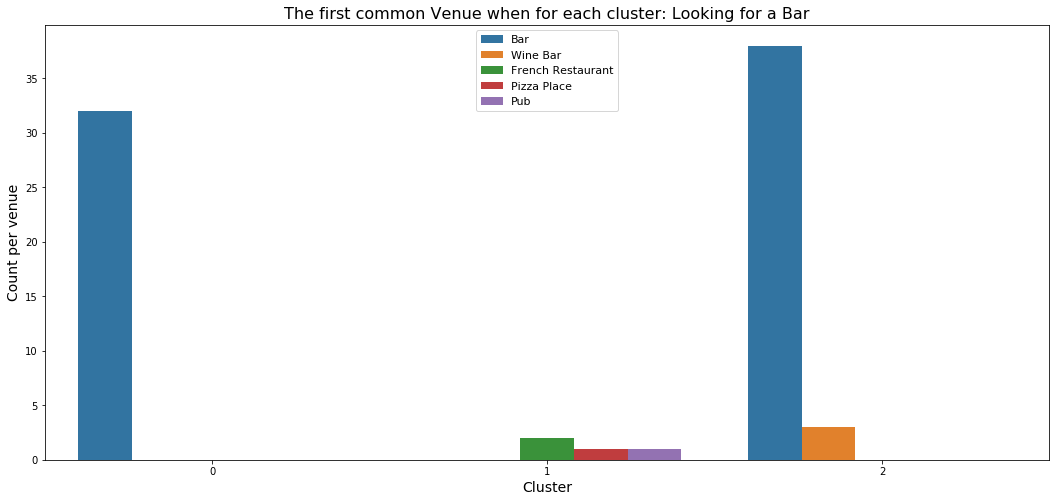

In [108]:
plt.figure(figsize=(18, 8))

sns.countplot("Cluster Labels",  hue="1st Most Common Venue",  data = paris_merged,)
plt.title("The first common Venue when for each cluster: Looking for a Bar", fontsize=16)
plt.xticks(np.arange(3), (0, 1, 2))
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Count per venue", fontsize=14)
plt.legend(fontsize=11)
plt.show()